In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-based-on-customer-behavior/Test Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Training Data.csv
/kaggle/input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score

In [3]:
sample_prediction= pd.read_csv('../input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv')
sample_prediction.head()

,id,risk_flag
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [4]:
test_data = pd.read_csv('../input/loan-prediction-based-on-customer-behavior/Test Data.csv')
test_data.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [5]:
training_data= pd.read_csv('../input/loan-prediction-based-on-customer-behavior/Training Data.csv')
training_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### first we will do data cleaning 

In [6]:
training_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
training_data.shape

(252000, 13)

### target varaible is risk flag

In [8]:
training_data["Risk_Flag"].unique()

array([0, 1])

In [9]:
training_data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Finding out number of null values 

In [10]:
training_data.isnull().sum() #no null values 

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

([<matplotlib.patches.Wedge at 0x7f2e90f5a5d0>,
 [Text(-1.0188922925859059, 0.4145581938751625, '0'),
  Text(1.018892263475599, -0.4145582654218472, '1')])

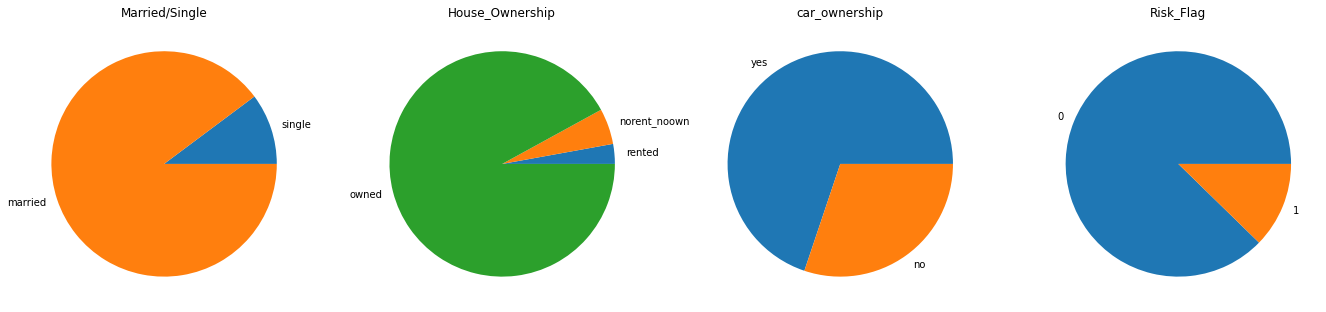

In [11]:
plt.subplot(1,4,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
label_age=['single','married']
plt.title("Married/Single")
plt.pie(training_data.groupby(training_data["Married/Single"]).size(),labels=label_age)

plt.subplot(1,4,2)
label_ed=['rented','norent_noown','owned']
plt.title("House_Ownership")
plt.pie(training_data.groupby(training_data["House_Ownership"]).size(),labels=label_ed)

plt.subplot(1,4,3)
label_car=['yes','no']
plt.title("car_ownership")
plt.pie(training_data.groupby(training_data["Car_Ownership"]).size(),labels=label_car)

plt.subplot(1,4,4)
plt.title("Risk_Flag")
label_r=[0,1]
plt.pie(training_data.groupby(training_data["Risk_Flag"]).size(),labels=label_r)

### Finding correlation through heatmap of all tha datasets 

In [12]:
import pandas as pd 
train=pd.read_csv("../input/loan-prediction-based-on-customer-behavior/Training Data.csv")
correlations=train.corr()
print(correlations)

                         Id    Income       Age  Experience  CURRENT_JOB_YRS  \
Id                 1.000000 -0.001324 -0.001816   -0.005810        -0.003250   
Income            -0.001324  1.000000 -0.000652    0.006422         0.007045   
Age               -0.001816 -0.000652  1.000000   -0.001118         0.002154   
Experience        -0.005810  0.006422 -0.001118    1.000000         0.646098   
CURRENT_JOB_YRS   -0.003250  0.007045  0.002154    0.646098         1.000000   
CURRENT_HOUSE_YRS  0.001972 -0.002397 -0.020134    0.019309         0.005372   
Risk_Flag          0.032153 -0.003091 -0.021809   -0.034523        -0.016942   

                   CURRENT_HOUSE_YRS  Risk_Flag  
Id                          0.001972   0.032153  
Income                     -0.002397  -0.003091  
Age                        -0.020134  -0.021809  
Experience                  0.019309  -0.034523  
CURRENT_JOB_YRS             0.005372  -0.016942  
CURRENT_HOUSE_YRS           1.000000  -0.004375  
Risk_Flag

In [13]:
train.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


In [14]:
print(correlations['Risk_Flag'])

Id                   0.032153
Income              -0.003091
Age                 -0.021809
Experience          -0.034523
CURRENT_JOB_YRS     -0.016942
CURRENT_HOUSE_YRS   -0.004375
Risk_Flag            1.000000
Name: Risk_Flag, dtype: float64


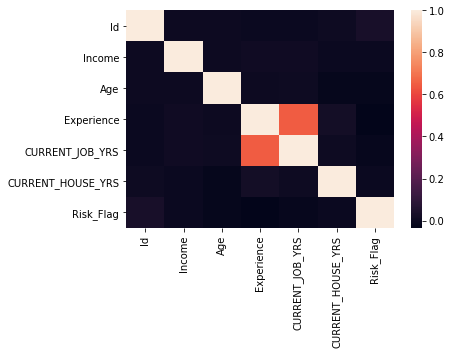

In [15]:
## always remember to use magic function in jupyter notebook :)
%matplotlib inline 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

### Now find the correlation for dataset sample prediction and test data 

In [16]:
test= pd.read_csv("../input/loan-prediction-based-on-customer-behavior/Test Data.csv")
correlation2= test.corr()
print(correlation2)

                         ID    Income       Age  Experience  CURRENT_JOB_YRS  \
ID                 1.000000 -0.006936  0.003830   -0.009118        -0.012008   
Income            -0.006936  1.000000 -0.001807    0.005232         0.007494   
Age                0.003830 -0.001807  1.000000    0.007206         0.006372   
Experience        -0.009118  0.005232  0.007206    1.000000         0.653193   
CURRENT_JOB_YRS   -0.012008  0.007494  0.006372    0.653193         1.000000   
CURRENT_HOUSE_YRS -0.006534 -0.006497 -0.026779    0.017830         0.007150   

                   CURRENT_HOUSE_YRS  
ID                         -0.006534  
Income                     -0.006497  
Age                        -0.026779  
Experience                  0.017830  
CURRENT_JOB_YRS             0.007150  
CURRENT_HOUSE_YRS           1.000000  


In [17]:
test.corr()

,ID,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
ID,1.000000,-0.006936,0.003830,-0.009118,-0.012008,-0.006534
Income,-0.006936,1.000000,-0.001807,0.005232,0.007494,-0.006497
Age,0.003830,-0.001807,1.000000,0.007206,0.006372,-0.026779
Experience,-0.009118,0.005232,0.007206,1.000000,0.653193,0.017830
CURRENT_JOB_YRS,-0.012008,0.007494,0.006372,0.653193,1.000000,0.007150
CURRENT_HOUSE_YRS,-0.006534,-0.006497,-0.026779,0.017830,0.007150,1.000000


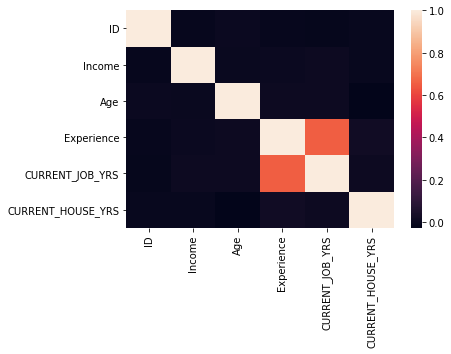

In [18]:
%matplotlib inline 
sns.heatmap(correlation2)
plt.show()

In [19]:
sample_prediction= pd.read_csv("../input/loan-prediction-based-on-customer-behavior/Sample Prediction Dataset.csv")
correlation3= sample_prediction.corr()
print(correlation3)

                 id  risk_flag
id         1.000000   0.000294
risk_flag  0.000294   1.000000


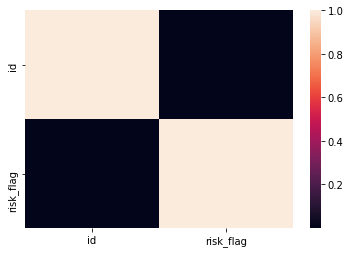

In [20]:
sns.heatmap(correlation3)
plt.show()

### Exploratory Data Analysis 

count    252000.000000
mean          0.123000
std           0.328438
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Risk_Flag, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


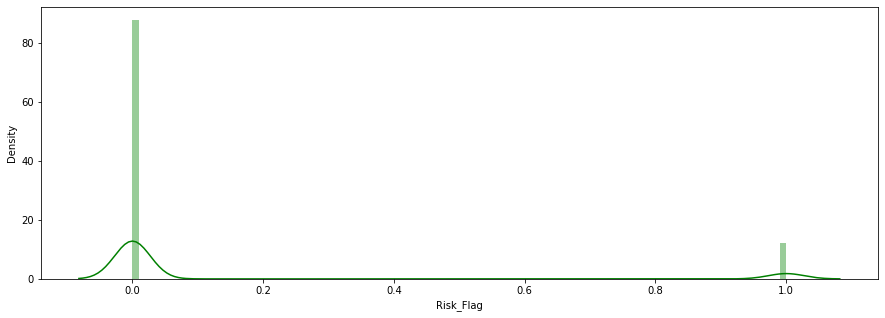

In [21]:
#our target feature is Risk_Flag lets first find EDA of Risk_Flag 
import pandas as pd 
training_data=pd.read_csv("../input/loan-prediction-based-on-customer-behavior/Training Data.csv")
print(training_data['Risk_Flag'].describe())
plt.figure(figsize=(15,5))
sns.distplot(training_data['Risk_Flag'],color='g',bins=100,hist_kws={'alpha':0.4});

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>,
        <AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>],
       [<AxesSubplot:title={'center':'Risk_Flag'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

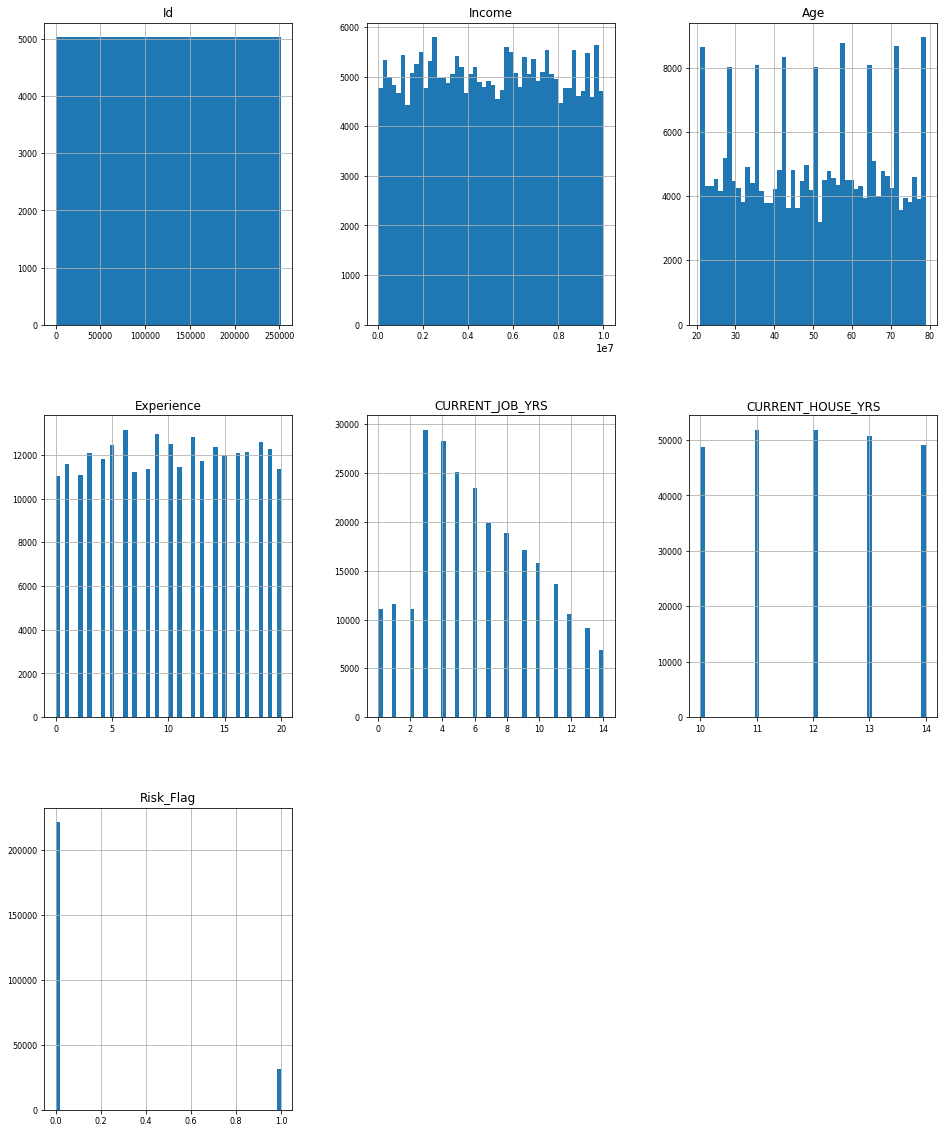

In [22]:
training_data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

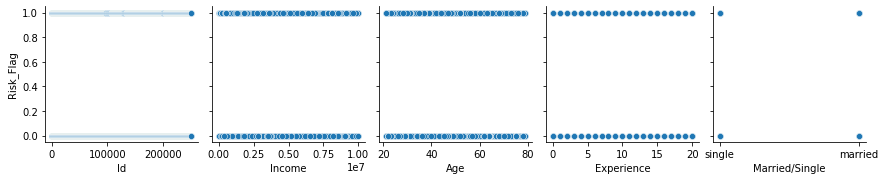

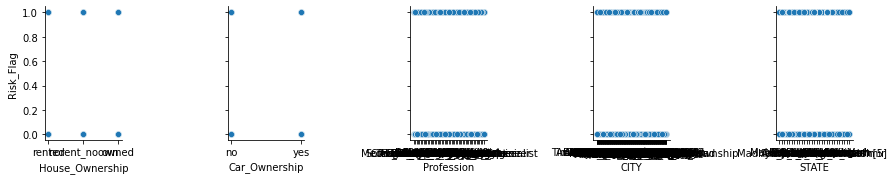

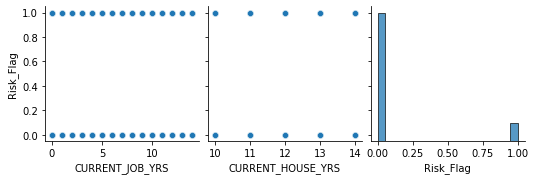

In [23]:
for i in range(0, len(training_data.columns), 5):
    sns.pairplot(data=training_data,
                x_vars=training_data.columns[i:i+5],
                y_vars=['Risk_Flag'])

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'CURRENT_JOB_YRS'}>,
        <AxesSubplot:title={'center':'CURRENT_HOUSE_YRS'}>]], dtype=object)

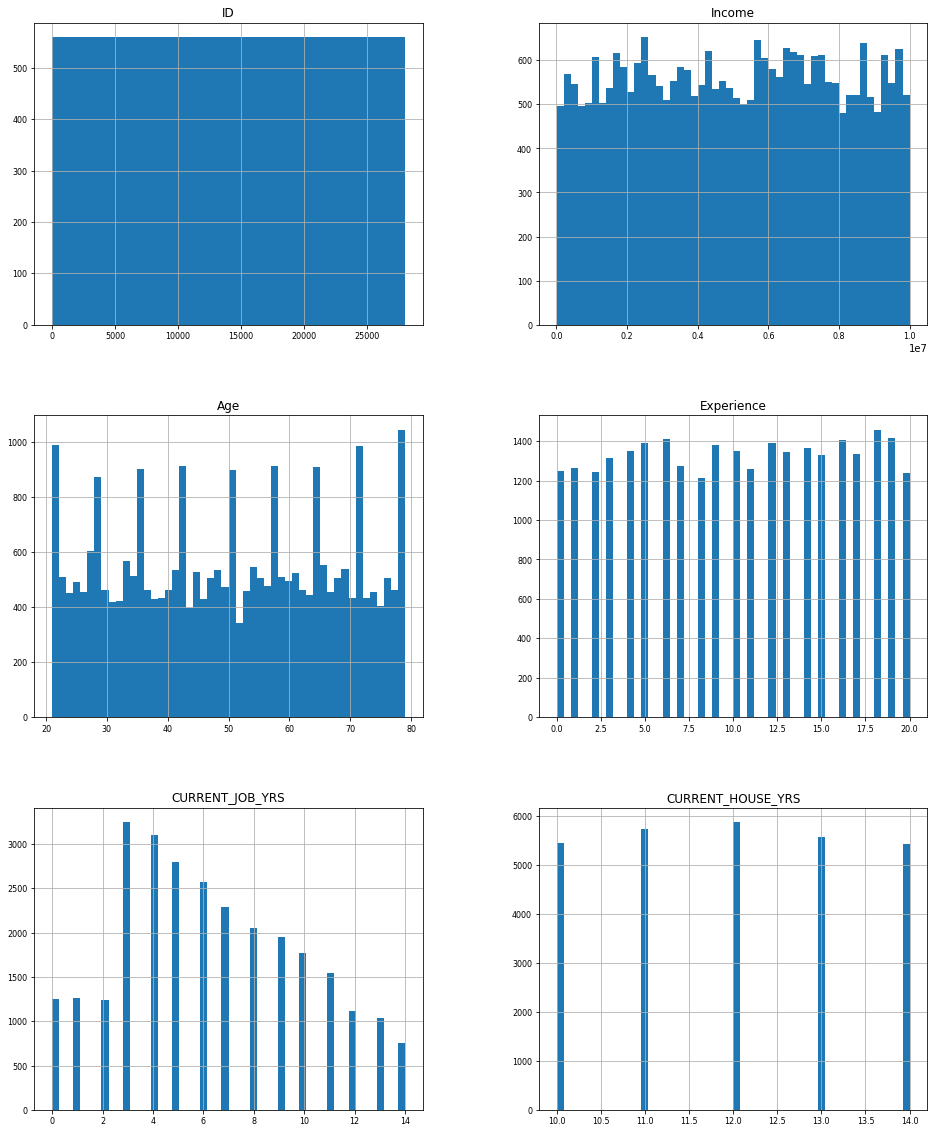

In [24]:
test_data.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

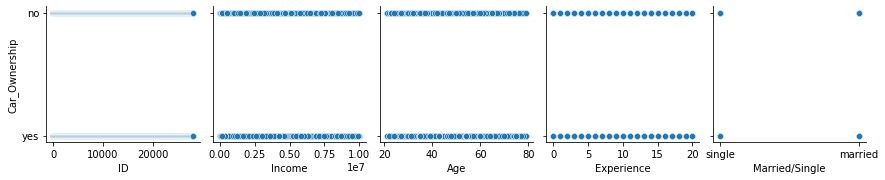

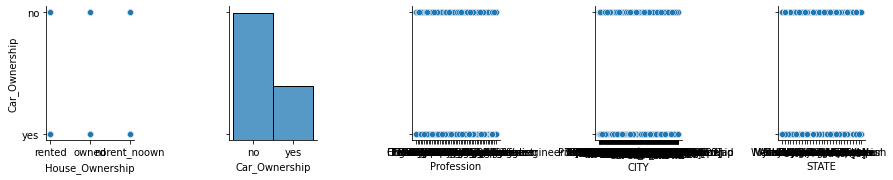

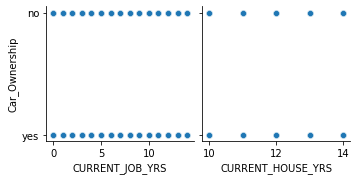

In [25]:
for i in range(0, len(test_data.columns), 5):
    sns.pairplot(data=test_data,
                x_vars=test_data.columns[i:i+5],
                y_vars=['Car_Ownership'])

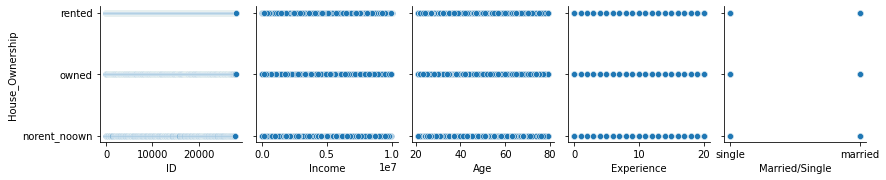

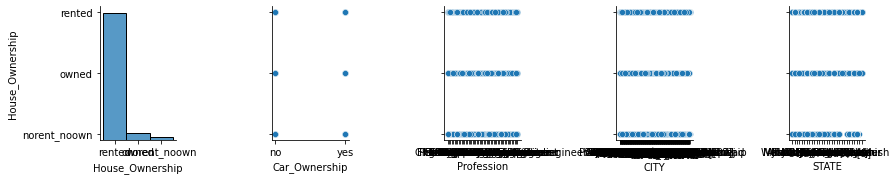

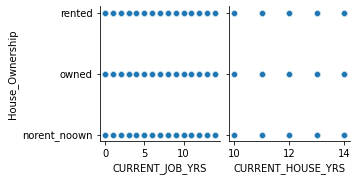

In [26]:
for i in range(0, len(test_data.columns), 5):
    sns.pairplot(data=test_data,
                x_vars=test_data.columns[i:i+5],
                y_vars=['House_Ownership'])

### now we will do label enconding of train dataset 

In [27]:
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [28]:
#label encoding 
label_ms=preprocessing.LabelEncoder()
training_data["Married/Single"]=label_ms.fit_transform(training_data["Married/Single"])

label_ho=preprocessing.LabelEncoder()
training_data["House_Ownership"]=label_ho.fit_transform(training_data["House_Ownership"])

label_co=preprocessing.LabelEncoder()
training_data["Car_Ownership"]=label_co.fit_transform(training_data["Car_Ownership"])


In [29]:
training_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,1,2,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,0,2,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,1,2,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,1,2,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [30]:
training_data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [31]:
#splitting of data
X=training_data[['Income','Age','Experience','Married/Single','House_Ownership','Car_Ownership','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]
y=training_data['Risk_Flag']

In [32]:
train_x, test_x, train_y, test_y=train_test_split(X, y, test_size=0.30, random_state=0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(176400, 8)
(75600, 8)
(176400,)
(75600,)


### Finding Accuracy Score and roc_auc_score of train dataset from Decision Tree Classifier 

In [33]:
import numpy as  np
import pandas as pd 
from sklearn.metrics import confusion_matrix
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def printdata():
    print("Dataset Length: ",len(training_data))
    print("Dataset shape: ",training_data.shape)

    #printing dataset observations 
    print("dataset: ",training_data.head())
    return training_data

#function to split dataset 
def splitdataset(training_data):
    #seperating the target variable
    X=training_data[['Income','Age','Experience','Married/Single','House_Ownership','Car_Ownership','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]
    Y=training_data['Risk_Flag']
    
    #splitting dataset into train and test 
    X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=100)
    
    return X,Y,X_train,X_test,y_train,y_test

#function to perform training with gini_index
def train_using_gini(X_train,X_test,y_train):
    #creating the classifier object 
    clf_gini= DecisionTreeClassifier(criterion="gini",random_state=100, max_depth=3,min_samples_leaf=5)
    
    #performing training 
    clf_gini.fit(X_train,y_train)
    return clf_gini

#function to perform training with entropy 
def train_using_entropy(X_train,X_test,y_train):
    
    #decision tree with entropy
    clf_entropy=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=3,min_samples_leaf=5)
    
    #performing training 
    clf_entropy.fit(X_train,y_train)
    return clf_entropy

#function to make predictions 
def prediction(X_test,clf_object):
    
    #prediction on test with ginniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred
      
    # Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred))
    print ( "Roc_Auc score %.2f: ", roc_auc_score ( y_test, y_pred ))
      
    print("Report : ",
    classification_report(y_test, y_pred))
  
# Driver code
def main():
      
    # Building Phase
    data = training_data
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
      
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
      

        # Calling main function
if __name__=="__main__":
    main()
       

Results Using Gini Index:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[55222     1]
 [ 7770     7]]
Accuracy :  0.8766507936507937
Roc_Auc score %.2f:  0.5004409908060686
Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93     55223
           1       0.88      0.00      0.00      7777

    accuracy                           0.88     63000
   macro avg       0.88      0.50      0.47     63000
weighted avg       0.88      0.88      0.82     63000

Results Using Entropy:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[55222     1]
 [ 7770     7]]
Accuracy :  0.8766507936507937
Roc_Auc score %.2f:  0.5004409908060686
Report :                precision    recall  f1-score   support

           0       0.88      1.00      0.93     55223
           1       0.88      0.00      0.00      7777

    accuracy                           0.88     63000
   macro avg       0.88      0.50      0.47     63000
weighted avg      